# Generate Animations of Single Simulations

In [1]:
# imports
from pathlib import Path
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from simulation import Simulation


# set plotting style
plt.style.use(['default', 'biophysics.mplstyle'])

# import simulation data to the Simulation class
data_dir = Path('data/nov26_paper_run_true')
sim_file = data_dir / 'sim_250_1.mat'
sim = Simulation(mat_file=sim_file, skip_check=True)

# define figure and animation save directory
fig_dir = Path('figures') / data_dir.name
fig_dir.mkdir(parents=True, exist_ok=True)
anim_dir = Path('animations') / data_dir.name
anim_dir.mkdir(parents=True, exist_ok=True)

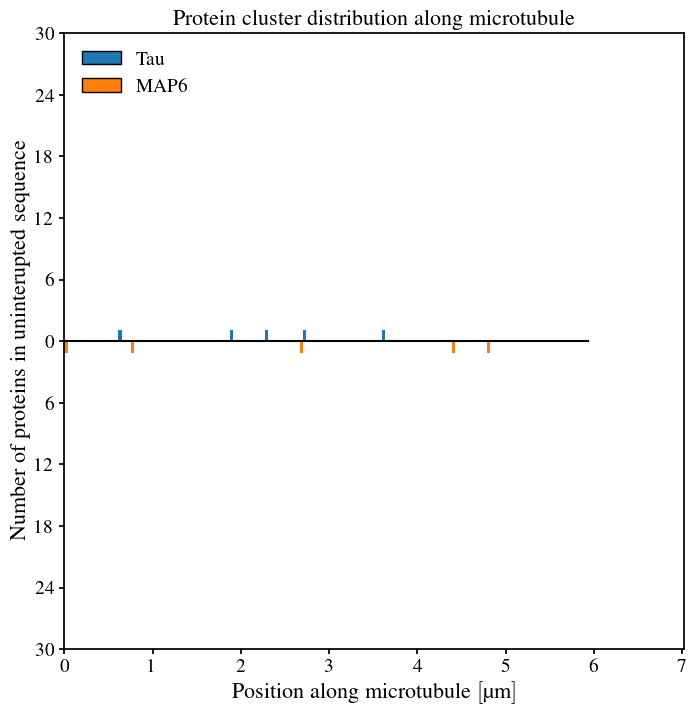

In [9]:
# plot sequence to check plotting parameters
fig, ax = plt.subplots()
step = int((1/0.001) * 500)
sim.plot_sequence_at(
    step=step,
    ax=ax,
    max_len=True,
    plot_points=False,
    point_domain_ticks=False,
)

# save figure
fig_file = fig_dir / f"sequence_plot_{sim.get_name()}_at_{step}"
fig.savefig(fig_file)

Generating Animation: 'sequence_animation_sim_250_1.mp4':   0%|          | 2104/600001 [04:43<22:21:03,  7.43it/s]


KeyboardInterrupt: 

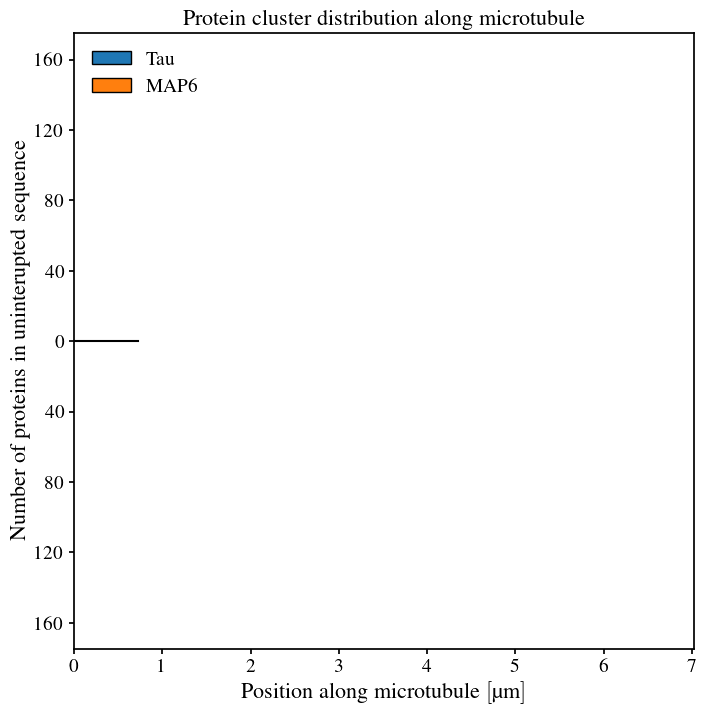

In [3]:
# animate simulation
fig, ax = plt.subplots()

# define the animation function
def animate(step: int, ax: Axes, sim: Simulation, ymax: float) -> None:
    # clear the axes
    ax.clear()

    # plot the simulation at the current time step
    sim.plot_sequence_at(
        step=step,
        ax=ax,
        ymax_override=ymax
    )

# define the function handle
ymax_override = sim.get_longest_seq()
anim_handle = partial(animate, ax=ax, sim=sim, ymax=ymax_override)

# generate the animation
anim_file = anim_dir / f"sequence_animation_{sim.get_name()}.mp4"
sim.animate_sequences(fig, anim_handle, anim_file)

# do not show the plot
plt.close(fig)